In [61]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("companies.csv")

In [63]:
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [64]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [65]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [66]:
df=df.drop(['region', 'city','state_code'], axis=1)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [67]:
df=df.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [68]:
df=df.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1)

In [69]:
df.shape

(196553, 19)

#### 1.d. Delete duplicate values if found any.

In [70]:
# Delete duplicate values if found any.
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [71]:
# check if any left
df.duplicated().any()

False

#### 1.e. Delete those which has more than 96% of null values.

In [72]:
# Since we can see only nan values so let's check how much of rows has nan values.
df.isnull().sum()

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [73]:
df=df.drop(['first_investment_at','last_investment_at','first_milestone_at','last_milestone_at','first_funding_at','last_funding_at','investment_rounds','ROI'],axis=1)

In [74]:
df.shape

(109464, 11)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [75]:
df.loc[:,['status','country_code','category_code','founded_at']].isnull().sum()

status               0
country_code     24870
category_code    12230
founded_at       26913
dtype: int64

In [76]:
df.dropna(axis=0,subset=['status', 'country_code', 'category_code', 'founded_at'],inplace=True)

In [77]:
# Since we can see only nan values so et's check how much of rows has nan values.
df.loc[:,['status','country_code','category_code','founded_at']].isnull().sum()

status           0
country_code     0
category_code    0
founded_at       0
dtype: int64

In [78]:
feat=['funding_total_usd','funding_rounds']
list(enumerate(feat))

[(0, 'funding_total_usd'), (1, 'funding_rounds')]

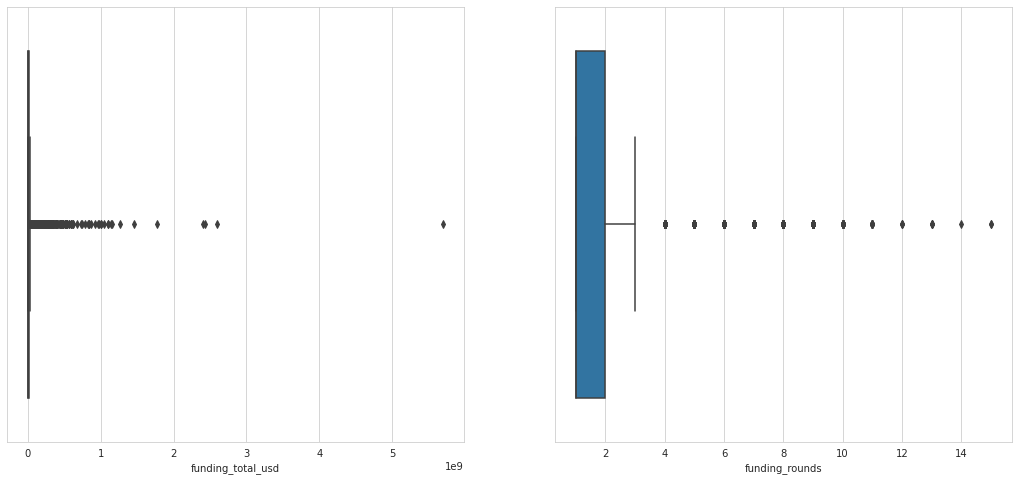

In [79]:
plt.figure(figsize=(18,8))
for i in enumerate(feat):
  plt.subplot(1,2,i[0]+1)
  sns.boxplot(df[i[1]])

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [80]:
usd25=df['funding_total_usd'].quantile(0.25)
usd75=df['funding_total_usd'].quantile(0.75)
iqr_usd=usd75-usd25

rounds25=df['funding_rounds'].quantile(0.25)
rounds75=df['funding_rounds'].quantile(0.75)
iqr_rounds=rounds75-rounds25


#### 2.b.1. Find the Upper and Lower limit

In [81]:
up_usd=usd75+1.5*iqr_usd
lower_usd=usd25+1.5*iqr_usd

In [82]:
up_rounds=rounds75-1.5*iqr_rounds
lower_rounds=rounds25-1.5*iqr_rounds

#### 2.b.1. Drop the outliers

In [83]:
filter1=df['funding_total_usd']<up_usd
filter2=df['funding_total_usd']>lower_usd

filter3=df['funding_rounds']<up_rounds
filter4=df['funding_rounds']>lower_rounds

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [84]:
df

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685


# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

In [85]:
#@title Default title text
df['founded_at']=pd.to_datetime(df['founded_at'],format="%Y-%m-%d")
df['founded_at']=pd.to_datetime(df['founded_at'],format="%Y-%m-%d").dt.year

df['closed_at']=pd.to_datetime(df['closed_at'],format="%Y-%m-%d")
df['closed_at']=pd.to_datetime(df['closed_at'],format="%Y-%m-%d").dt.year

#df['first_funding_at']=pd.to_datetime(df['first_funding_at'],format="%Y-%m-%d")
#df['first_funding_at']=pd.to_datetime(df['first_funding_at'],format="%Y-%m-%d").dt.year

#df['last_funding_at']=pd.to_datetime(df['last_funding_at'],format="%Y-%m-%d")
#df['last_funding_at']=pd.to_datetime(df['last_funding_at'],format="%Y-%m-%d").dt.year

#df['first_milestone_at']=pd.to_datetime(df['first_milestone_at'],format="%Y-%m-%d")
#df['first_milestone_at']=pd.to_datetime(df['first_milestone_at'],format="%Y-%m-%d").dt.year

#df['last_milestone_at']=pd.to_datetime(df['last_milestone_at'],format="%Y-%m-%d")
#df['last_milestone_at']=pd.to_datetime(df['last_milestone_at'],format="%Y-%m-%d").dt.year



#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [86]:
unique_category=pd.unique(df['category_code'])
unique_category,len(unique_category)

(array(['web', 'advertising', 'cleantech', 'games_video', 'mobile',
        'health', 'software', 'analytics', 'network_hosting', 'consulting',
        'finance', 'education', 'medical', 'manufacturing', 'enterprise',
        'other', 'ecommerce', 'public_relations', 'hardware', 'search',
        'news', 'government', 'security', 'biotech', 'photo_video',
        'travel', 'semiconductor', 'social', 'legal', 'transportation',
        'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
        'music', 'automotive', 'design', 'real_estate', 'local',
        'nanotech', 'pets'], dtype=object), 42)

In [87]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
df.category_code.value_counts().sort_values(ascending=False).head(15)

software            11360
web                  7937
ecommerce            4984
other                4738
mobile               3926
advertising          3754
games_video          2918
consulting           2806
enterprise           2773
biotech              2534
public_relations     1595
hardware             1557
network_hosting      1348
education            1191
search               1008
Name: category_code, dtype: int64

In [88]:
# Lets keep the category as same of it falls under above 15 otherwise let's replace it with other.
def get_category(actual_category):
  categories = ['software', 'web', 'biotech', 'mobile', 'enterprise', 'ecommerce', 'games_video', 'advertising', 
              'hardware', 'education','consulting','public_relations','network_hosting','search']

  if actual_category in categories:
    return actual_category
  else:
    return 'other'

In [89]:
df['category_code']=df.apply(lambda x: get_category(x['category_code']),axis=1)
df['category_code']

0                      web
5              advertising
6                    other
12             advertising
13                     web
                ...       
196548           ecommerce
196549    public_relations
196550          consulting
196551              search
196552           ecommerce
Name: category_code, Length: 63585, dtype: object

In [90]:
# Let's check if we've more than 15 columns
df.category_code.value_counts().sort_values(ascending=False)

other               13894
software            11360
web                  7937
ecommerce            4984
mobile               3926
advertising          3754
games_video          2918
consulting           2806
enterprise           2773
biotech              2534
public_relations     1595
hardware             1557
network_hosting      1348
education            1191
search               1008
Name: category_code, dtype: int64

In [91]:
# One-hot encoding to category_code
category = pd.get_dummies(df[['category_code']],drop_first=True)
category.head()

,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
# Concatenate category with company dataset
df = pd.concat([df, category], axis=1)
df

,category_code,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
0,web,operating,2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,...,0,0,0,0,0,0,0,0,0,1
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,...,0,0,0,0,0,0,0,0,0,0
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,...,0,0,0,0,0,1,0,0,0,0
12,advertising,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,...,0,0,0,0,0,0,0,0,0,0
13,web,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,...,0,0,0,0,0,0,0,0,0,0
196549,public_relations,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,...,0,0,0,0,0,0,1,0,0,0
196550,consulting,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,...,0,0,0,0,0,0,0,0,0,0
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,...,0,0,0,0,0,0,0,1,0,0


In [93]:
# Since, We've added the encoded category_columns, let's delete original category_code
df=df.drop('category_code', axis=1)

In [94]:
df.shape

(63585, 24)

### Let's encode 'country' column now.

In [95]:
un_country=pd.unique(df['country_code'])
un_country, len(un_country)

(array(['USA', 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
        'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
        'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
        'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'ARG',
        'CHE', 'UKR', 'ITA', 'NZL', 'CZE', 'VNM', 'NOR', 'HRV', 'BEN',
        'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
        'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
        'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
        'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
        'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
        'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
        'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
        'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
        'AFG', 'BLZ', 'UZB', 'CYM', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI',
      

In [96]:
# Since there are 108 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.
df.country_code.value_counts().sort_values(ascending=True)

SDN        1
TTO        1
NFK        1
AND        1
MCO        1
       ...  
DEU     1409
CAN     2688
IND     3018
GBR     5101
USA    36778
Name: country_code, Length: 165, dtype: int64

In [97]:
df

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
0,operating,2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0,0,0,0,0,0,0,0,0,1
5,operating,2007,NaN,MAR,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,0,0
13,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,0,0
196549,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0,0,0,0,0,0,1,0,0,0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,0,0,0,0
196551,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.
countries = ['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'DEU', 'IND', 'ESP', 'AUS', 'IRL','NLD','BRA']
def get_country(actual_country):
  if actual_country in countries:
    return actual_country
  else:
    return "other"

In [99]:
df['country_code']=df.apply(lambda x: get_country(x['country_code']),axis=1)
df['country_code']

0           USA
5         other
6           IND
12          USA
13          USA
          ...  
196548      USA
196549      USA
196550      USA
196551      USA
196552      USA
Name: country_code, Length: 63585, dtype: object

In [100]:
country=df[['country_code']]
country=pd.get_dummies(country,drop_first=True)
country.head()

,country_code_BRA,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,1,0
13,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
df=pd.concat([df,country],axis=1)
df

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,operating,2005,NaN,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0,0,0,0,0,0,0,0,1,0
5,operating,2007,NaN,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,0,1
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,0,1,0,0,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,0,1,0
13,acquired,2007,NaN,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,0,1,0
196549,operating,2007,NaN,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0,0,0,0,0,0,0,0,1,0
196550,operating,1959,NaN,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,0,0,1,0
196551,operating,2008,NaN,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0,0,0,0,0,0,0,0,1,0


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [102]:
df.status.value_counts()

operating    57447
acquired      3897
closed        1629
ipo            612
Name: status, dtype: int64

In [103]:
def get_icClosed(status):
  if status=='operating':
    return 1
  elif status=='ipo':
    return 1
  else:
    return 0

In [104]:
df['isClosed']=df.apply(lambda x: get_icClosed(x['status']),axis=1)
df['isClosed']

0         1
5         1
6         1
12        1
13        0
         ..
196548    1
196549    1
196550    1
196551    1
196552    1
Name: isClosed, Length: 63585, dtype: int64

In [105]:
unique_closed=pd.unique(df['closed_at'])
unique_closed

array([  nan, 2010., 2012., 2013., 2009., 2011., 2008., 2001., 2006.,
       1963., 1991., 2005., 2007., 1998., 2004., 1997., 2000.])

In [106]:
operating=['operating','ipo']
nonoperating=['closed','acquired']
df.loc[df.status.isin(operating),'closed_at']=2021
df.loc[df.status.isin(nonoperating),'closed_at']=0

In [107]:
df.dropna(axis=0,subset=['closed_at'],inplace=True)
df

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed
0,operating,2005,2021.0,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0,0,0,0,0,0,0,1,0,1
5,operating,2007,2021.0,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,0,1,1
6,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,0,1,0,0,0,0,0,1
12,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,0,1,0,1
13,acquired,2007,0.0,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021.0,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,0,1,0,1
196549,operating,2007,2021.0,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0,0,0,0,0,0,0,1,0,1
196550,operating,1959,2021.0,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,0,1,0,1
196551,operating,2008,2021.0,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0,0,0,0,0,0,0,1,0,1


In [108]:
df['Active_days']=(df['closed_at']-df['founded_at'])*365
df.loc[df.Active_days<0,'Active_days']=0
df

,status,founded_at,closed_at,country_code,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,Active_days
0,operating,2005,2021.0,USA,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,...,0,0,0,0,0,0,1,0,1,5840.0
5,operating,2007,2021.0,other,NaN,NaN,NaN,2.0,30.427755,-9.598107,...,0,0,0,0,0,0,0,1,1,5110.0
6,operating,2008,2021.0,IND,NaN,NaN,NaN,NaN,22.307159,73.181219,...,0,0,1,0,0,0,0,0,1,4745.0
12,operating,2008,2021.0,USA,NaN,NaN,1.0,2.0,35.686975,-105.937799,...,0,0,0,0,0,0,1,0,1,4745.0
13,acquired,2007,0.0,USA,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,...,0,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021.0,USA,NaN,NaN,2.0,5.0,37.774929,-122.419415,...,0,0,0,0,0,0,1,0,1,5110.0
196549,operating,2007,2021.0,USA,1.0,750000.0,1.0,14.0,37.338208,-121.886329,...,0,0,0,0,0,0,1,0,1,5110.0
196550,operating,1959,2021.0,USA,NaN,NaN,3.0,44.0,38.882334,-77.171091,...,0,0,0,0,0,0,1,0,1,22630.0
196551,operating,2008,2021.0,USA,NaN,NaN,NaN,1.0,34.052234,-118.243685,...,0,0,0,0,0,0,1,0,1,4745.0


In [109]:
df=df.drop(['closed_at','country_code'],axis=1)
df.head()

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,Active_days
0,operating,2005,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
5,operating,2007,NaN,NaN,NaN,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,0,1,1,5110.0
6,operating,2008,NaN,NaN,NaN,NaN,22.307159,73.181219,0,0,...,0,0,1,0,0,0,0,0,1,4745.0
12,operating,2008,NaN,NaN,1.0,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
13,acquired,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0,0,...,0,0,0,0,0,0,1,0,0,0.0


In [110]:
def get_status(status):
  if status=='operating':
    return 1
  elif status=='acquired':
    return 2
  elif status=='closed':
    return 3
  else:
    return 4
  

In [111]:
df['status']=df.apply(lambda x: get_status(x['status']),axis=1)
df['status']

0         1
5         1
6         1
12        1
13        2
         ..
196548    1
196549    1
196550    1
196551    1
196552    1
Name: status, Length: 63585, dtype: int64

In [112]:
funding_rounds=df['funding_rounds'].mean().round()
funding_total_usd=df['funding_total_usd'].mean().round()
milestones=df['milestones'].mean().round()

df['funding_rounds']=df['funding_rounds'].fillna(funding_rounds)
df['funding_total_usd']=df['funding_total_usd'].fillna(funding_total_usd)
df['milestones']=df['milestones'].fillna(milestones)

In [113]:
df

,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,category_code_consulting,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,Active_days
0,1,2005,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,0,0,...,0,0,0,0,0,0,1,0,1,5840.0
5,1,2007,2.0,15821318.0,1.0,2.0,30.427755,-9.598107,0,0,...,0,0,0,0,0,0,0,1,1,5110.0
6,1,2008,2.0,15821318.0,1.0,NaN,22.307159,73.181219,0,0,...,0,0,1,0,0,0,0,0,1,4745.0
12,1,2008,2.0,15821318.0,1.0,2.0,35.686975,-105.937799,0,0,...,0,0,0,0,0,0,1,0,1,4745.0
13,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0,0,...,0,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,1,2007,2.0,15821318.0,2.0,5.0,37.774929,-122.419415,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
196549,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0,0,...,0,0,0,0,0,0,1,0,1,5110.0
196550,1,1959,2.0,15821318.0,3.0,44.0,38.882334,-77.171091,0,1,...,0,0,0,0,0,0,1,0,1,22630.0
196551,1,2008,2.0,15821318.0,1.0,1.0,34.052234,-118.243685,0,0,...,0,0,0,0,0,0,1,0,1,4745.0


In [114]:
df.isnull().sum()

status                                0
founded_at                            0
funding_rounds                        0
funding_total_usd                     0
milestones                            0
relationships                     15290
lat                                2374
lng                                2374
category_code_biotech                 0
category_code_consulting              0
category_code_ecommerce               0
category_code_education               0
category_code_enterprise              0
category_code_games_video             0
category_code_hardware                0
category_code_mobile                  0
category_code_network_hosting         0
category_code_other                   0
category_code_public_relations        0
category_code_search                  0
category_code_software                0
category_code_web                     0
country_code_BRA                      0
country_code_CAN                      0
country_code_DEU                      0


In [115]:
df.dropna(inplace=True)

In [116]:
df.reset_index()

,index,status,founded_at,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,category_code_biotech,...,country_code_FRA,country_code_GBR,country_code_IND,country_code_IRL,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isClosed,Active_days
0,0,1,2005,3.0,39750000.0,5.0,17.0,47.606209,-122.332071,0,...,0,0,0,0,0,0,1,0,1,5840.0
1,5,1,2007,2.0,15821318.0,1.0,2.0,30.427755,-9.598107,0,...,0,0,0,0,0,0,0,1,1,5110.0
2,12,1,2008,2.0,15821318.0,1.0,2.0,35.686975,-105.937799,0,...,0,0,0,0,0,0,1,0,1,4745.0
3,13,2,2007,1.0,5000000.0,3.0,14.0,37.386052,-122.083851,0,...,0,0,0,0,0,0,1,0,0,0.0
4,15,1,2008,2.0,15821318.0,1.0,3.0,33.078655,-116.601964,0,...,0,0,0,0,0,0,1,0,1,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46741,196548,1,2007,2.0,15821318.0,2.0,5.0,37.774929,-122.419415,0,...,0,0,0,0,0,0,1,0,1,5110.0
46742,196549,1,2007,1.0,750000.0,1.0,14.0,37.338208,-121.886329,0,...,0,0,0,0,0,0,1,0,1,5110.0
46743,196550,1,1959,2.0,15821318.0,3.0,44.0,38.882334,-77.171091,0,...,0,0,0,0,0,0,1,0,1,22630.0
46744,196551,1,2008,2.0,15821318.0,1.0,1.0,34.052234,-118.243685,0,...,0,0,0,0,0,0,1,0,1,4745.0


In [117]:
df.to_csv('CleanedFinalData')